# Import libs

In [2]:
import numpy as np
#import matplotlib as plt
import pandas as pd
import pickle
import sklearn.datasets as datasets
from matplotlib import pyplot as plt


In [3]:
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('dark_background')

# Dataset


In [4]:
x,y = datasets.make_moons(n_samples = 500, noise = 0.05)

In [5]:
print(f'{x.shape = }, {y.shape = }')

x.shape = (500, 2), y.shape = (500,)


In [6]:
pd.DataFrame({'x_1': x[:,0], 'x_2': x[:, 1], 'y': y})

,x_1,x_2,y
0,1.695555,-0.219370,1
1,1.893989,0.021636,1
2,1.641760,-0.316530,1
3,-1.063808,-0.052651,0
4,-1.023799,0.387314,0
...,...,...,...
495,0.984754,0.083550,0
496,-0.832270,0.545210,0
497,0.335245,0.944728,0
498,0.063541,-0.108696,1


In [7]:
unique = np.unique(y, return_counts= True)
for label, qt_label in zip(unique[0], unique[1]):
    print(f'Label: {label}\t Counts: {qt_label}')

Label: 0	 Counts: 250
Label: 1	 Counts: 250


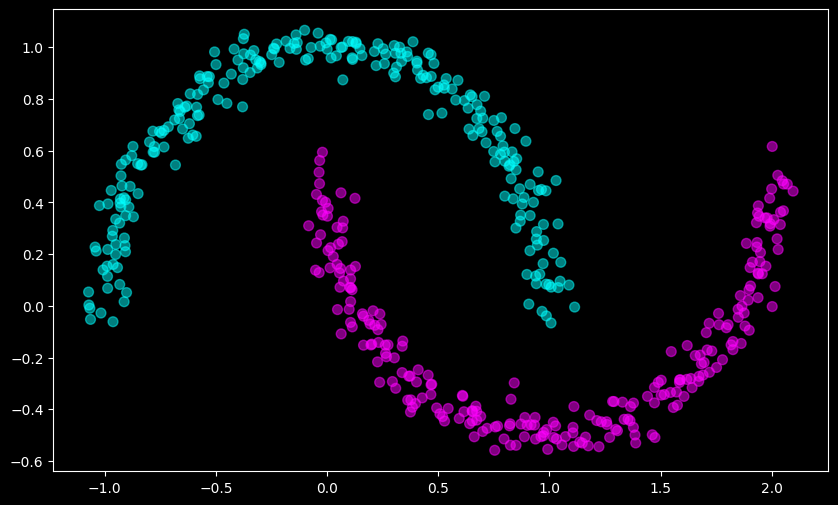

In [8]:
plt.scatter(x[:, 0], x[:, 1], c = y, s = 50, alpha = 0.5, cmap = 'cool')

# Modelo


In [9]:
class Perceptron:
  def __init__(self, x: np.ndarray, y: np.ndarray, hidden_neurons: int = 10, output_neurons : int = 2):

    np.random.seed(8)
    self.x = x
    self.y = y
    self.hidden_neurons = hidden_neurons
    self.output_neurons = output_neurons
    self.input_neurons = self.x.shape[1]

    #Pesos e Baias
    self.W1 = np.random.randn(self.input_neurons, self.hidden_neurons) / np.sqrt(self.input_neurons)
    self.B1 = np.zeros((1, self.hidden_neurons))
    self.W2 = np.random.randn(self.hidden_neurons, self.output_neurons) / np.sqrt(self.hidden_neurons)
    self.B2 = np.zeros((1, self.output_neurons))
    self.model_dict = {'W1': self.W1, 'B1': self.B1, 'W2': self.W2, 'B2': self.B2 }
    self.z1 = 0
    self.f1 = 0

    pass

  def foward(self, x: np.ndarray) -> np.ndarray:
    # Equação da Reta
    self.z1 = x.dot(self.W1) + self.B1

    # Função de Ativação
    self.f1 = np.tanh(self.z1)

    # Equação da reta (2)
    z2 = self.f1.dot(self.W2) + self.B2

    # Softmax
    exp_values = np.exp(z2)
    softmax = exp_values/np.sum(exp_values, axis = 1, keepdims = True)
    return softmax

  def show_plot(self, predictions):
    if self.x.shape[1] != 2:
      return

    plt.scatter(self.x[:, 0], self.x[:, 1], c = predictions, s = 50, alpha = 0.5, cmap = 'cool')

  def loss(self, softmax):
    #Cross Entropy
    predictions = np.zeros(self.y.shape[0])
    for i,  correct_index in enumerate(self.y):
        predicted = softmax[i][correct_index]
        predictions[i] = predicted

    log_prob = -np.log(predicted)
    return log_prob/self.y.shape[0]

    pass

  def backpropagation(self, softmax: np.ndarray, learning_rate: float) -> None:
    delta2 = np.copy(softmax)
    delta2[range(x.shape[0]),y] -= 1

    dW2 = (self.f1.T).dot(delta2)
    dB2 = np.sum(delta2, axis = 0, keepdims=True)

    delta1 = delta2.dot(self.W2.T)*(1-np.power(np.tanh(self.z1),2))
    dW1 = (self.x.T).dot(delta1)
    dB1 = np.sum(delta1, axis = 0, keepdims=True)

    #update
    self.W1 += - learning_rate*dW1
    self.W2 += - learning_rate*dW2
    self.B1 += - learning_rate*dB1
    self.B2 += - learning_rate*dB2


  def fit(self, epochs: int, lr: float):

      for epoch in range(epochs):
        outputs = self.foward(self.x)
        loss = self.loss(outputs)
        self.backpropagation(outputs, lr)

        # Acurácia
        prediction = np.argmax(outputs, axis = 1)
        correct = (prediction == self.y).sum()
        accuracy = correct/self.y.shape[0]

        if int((epoch+1) % (epochs/10)) == 0:
          print(f'Epoch: [{epoch+1} / {epochs}] Accuracy: {accuracy:.3f} Loss: {loss.item():.4f}')




In [10]:
hidden_neurons = 10
output_neurons = 2
learning_rate = 0.002
epochs = 50

In [11]:
modelo = Perceptron(x,y, hidden_neurons = hidden_neurons, output_neurons=output_neurons)
result = modelo.fit(epochs, learning_rate)

Epoch: [5 / 50] Accuracy: 0.786 Loss: 0.0003
Epoch: [10 / 50] Accuracy: 0.850 Loss: 0.0001
Epoch: [15 / 50] Accuracy: 0.888 Loss: 0.0001
Epoch: [20 / 50] Accuracy: 0.896 Loss: 0.0001
Epoch: [25 / 50] Accuracy: 0.904 Loss: 0.0000
Epoch: [30 / 50] Accuracy: 0.910 Loss: 0.0000
Epoch: [35 / 50] Accuracy: 0.916 Loss: 0.0000
Epoch: [40 / 50] Accuracy: 0.920 Loss: 0.0000
Epoch: [45 / 50] Accuracy: 0.928 Loss: 0.0000
Epoch: [50 / 50] Accuracy: 0.932 Loss: 0.0000


# Teste e resultado

<ipython-input-12-b1e049b77eaf>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:, 0], x[:, 1], c = result, s = 50, alpha = 0.5, cmap = '#1f77b4')


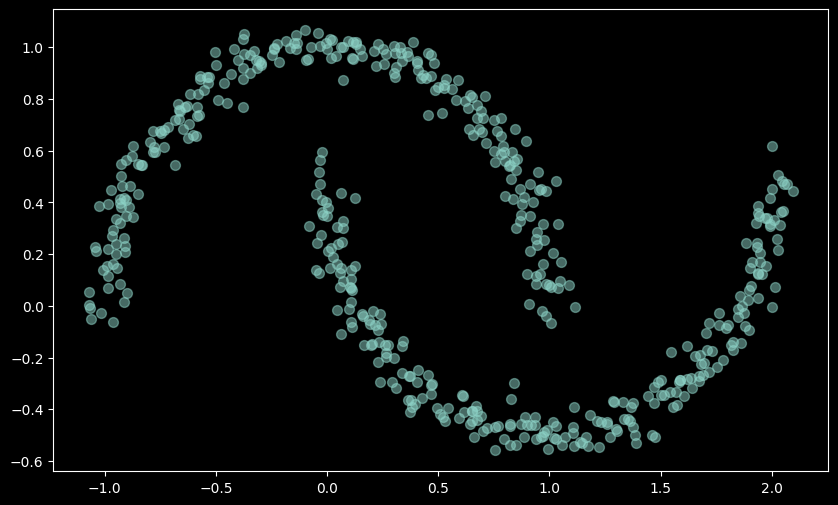

In [12]:
plt.scatter(x[:, 0], x[:, 1], c = result, s = 50, alpha = 0.5, cmap = '#1f77b4')

# Cluester Dataset

In [17]:
x_, y_ = datasets.make_blobs(n_samples = 500, n_features = 2, centers = 4, random_state = 10, cluster_std = 0.5,  shuffle = True)

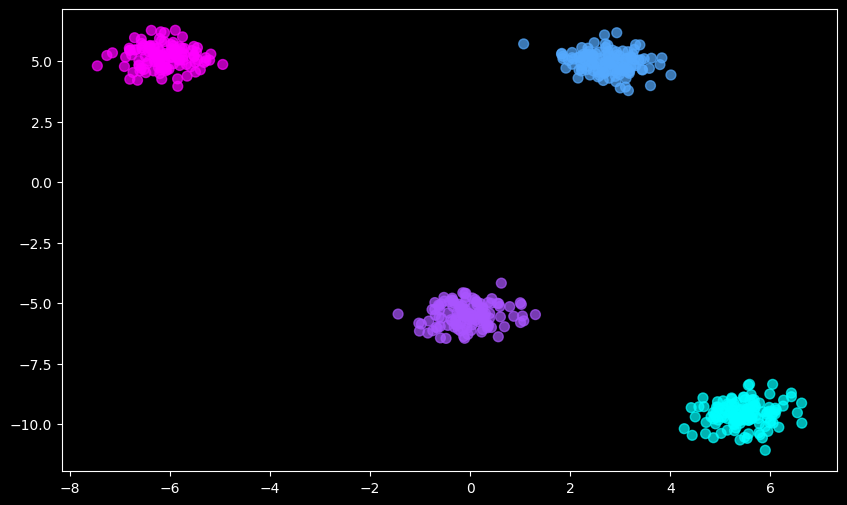

In [18]:
plt.scatter(x_[:, 0], x_[:, 1], c = y_, s = 50, alpha = 0.7, cmap = 'cool')

In [49]:
hidden_neurons = 8
output_neurons = 4
learning_rate = 0.002
epochs = 1000

In [50]:
modelo = Perceptron(x_,y_, hidden_neurons = hidden_neurons, output_neurons=output_neurons)
result = modelo.fit(400, 0.001)

Epoch: [40 / 400] Accuracy: 0.014 Loss: 0.0015
Epoch: [80 / 400] Accuracy: 0.044 Loss: 0.0015
Epoch: [120 / 400] Accuracy: 0.056 Loss: 0.0015
Epoch: [160 / 400] Accuracy: 0.060 Loss: 0.0015
Epoch: [200 / 400] Accuracy: 0.064 Loss: 0.0015
Epoch: [240 / 400] Accuracy: 0.066 Loss: 0.0015
Epoch: [280 / 400] Accuracy: 0.066 Loss: 0.0015
Epoch: [320 / 400] Accuracy: 0.066 Loss: 0.0015
Epoch: [360 / 400] Accuracy: 0.066 Loss: 0.0015
Epoch: [400 / 400] Accuracy: 0.066 Loss: 0.0015


# Novo Dataframe

In [21]:
df = datasets.load_breast_cancer(as_frame = True)

In [22]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [23]:
df['data'].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
np.unique(df.target, return_counts=True), df.target_names


((array([0, 1]), array([212, 357])),
 array(['malignant', 'benign'], dtype='<U9'))

In [25]:
for target, target_name in zip(np.unique(df.target), df.target_names):
  print(f'Classe: { target} \t Nome: {target_name}')

Classe: 0 	 Nome: malignant
Classe: 1 	 Nome: benign


In [32]:
x_bc = df.data.to_numpy()[:, 4:9]
y_bc = df.target.to_numpy()
x_bc.shape

(569, 5)

In [36]:
bc = Perceptron(x = x_bc, y=y_bc, hidden_neurons = 10, output_neurons = 2)
bc.fit(epochs = 1000, lr = 0.001)

Epoch: [100 / 1000] Accuracy: 0.158 Loss: 0.0012
Epoch: [200 / 1000] Accuracy: 0.373 Loss: 0.0048
Epoch: [300 / 1000] Accuracy: 0.373 Loss: 0.0049
Epoch: [400 / 1000] Accuracy: 0.373 Loss: 0.0049
Epoch: [500 / 1000] Accuracy: 0.373 Loss: 0.0049
Epoch: [600 / 1000] Accuracy: 0.373 Loss: 0.0049
Epoch: [700 / 1000] Accuracy: 0.373 Loss: 0.0049
Epoch: [800 / 1000] Accuracy: 0.373 Loss: 0.0049
Epoch: [900 / 1000] Accuracy: 0.373 Loss: 0.0049
Epoch: [1000 / 1000] Accuracy: 0.373 Loss: 0.0049
